In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
om sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X,y=make_blobs(n_samples=1000,centers=6,random_state=42) #by default there will be 2 features
plt.scatter(X[:,0],X[:,1])

In [35]:
#Inbuilt KmeansClustering

In [36]:
from sklearn.cluster import KMeans

In [37]:
model=KMeans(n_clusters=6)

In [38]:
model.fit(X) #this is a unsupervised learning algorithm, so pass only X

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
centers=model.cluster_centers_

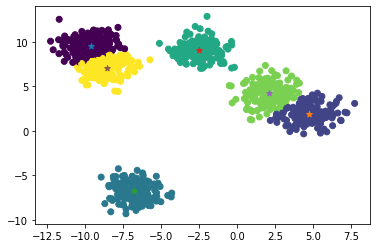

In [40]:
plt.scatter(X[:,0],X[:,1],c=model.labels_) #2 clusters are formed now

for center in centers:
    plt.scatter(center[0],center[1],marker="*")

In [41]:
model.labels_ #for 1000 items

array([2, 1, 5, 2, 0, 2, 4, 0, 2, 0, 0, 0, 4, 2, 4, 5, 3, 4, 3, 0, 1, 3,
       4, 2, 3, 4, 1, 5, 0, 4, 1, 4, 0, 5, 3, 2, 0, 0, 4, 3, 0, 4, 5, 2,
       4, 2, 2, 2, 3, 2, 2, 0, 5, 3, 3, 3, 3, 5, 5, 3, 1, 4, 2, 0, 2, 1,
       0, 5, 1, 2, 0, 2, 1, 2, 5, 3, 5, 2, 2, 5, 1, 1, 2, 5, 4, 2, 3, 0,
       3, 5, 1, 5, 1, 0, 0, 0, 3, 3, 5, 4, 2, 0, 1, 2, 3, 2, 1, 2, 0, 3,
       3, 1, 5, 2, 4, 3, 4, 2, 3, 0, 0, 1, 2, 2, 2, 2, 4, 0, 3, 1, 2, 4,
       1, 0, 2, 4, 1, 0, 3, 5, 2, 1, 1, 3, 1, 1, 5, 1, 1, 0, 4, 5, 1, 1,
       3, 2, 1, 3, 5, 1, 1, 4, 5, 3, 4, 4, 0, 4, 3, 1, 2, 3, 3, 5, 0, 2,
       5, 2, 2, 0, 1, 3, 1, 4, 0, 0, 1, 2, 4, 3, 5, 3, 1, 0, 1, 3, 0, 2,
       1, 1, 0, 4, 2, 2, 4, 0, 0, 3, 0, 1, 3, 5, 4, 0, 2, 5, 5, 5, 5, 0,
       0, 5, 3, 2, 3, 0, 5, 0, 2, 1, 3, 1, 1, 1, 2, 4, 3, 3, 5, 2, 0, 4,
       5, 0, 5, 0, 2, 5, 4, 4, 5, 5, 4, 1, 0, 3, 4, 1, 1, 3, 2, 5, 2, 5,
       1, 4, 4, 4, 2, 2, 1, 1, 4, 5, 3, 0, 5, 3, 4, 4, 0, 5, 2, 5, 5, 4,
       2, 2, 1, 3, 0, 3, 4, 0, 1, 4, 0, 0, 3, 0, 5,

In [42]:
#Custom kNMeans:
import random

In [43]:
class Cluster:
    def __init__(self,name,center):
        self.name=name #name of cluster
        self.center=center #its center
        self.points=[] #points in that cluster
        
    def dist(self,point):
        return np.sqrt(np.sum((self.center-point)**2)) #distance between a point between center and the particular point of a cluster
    
    def relocate(self):
        self.center=np.mean(self.points,axis=0) #updating cluster center, refer notebook notes for the algorithm.
        self.points=[] #as the center relocates, frse dekhenge dist between points and center, aur define krenge konsa point konse center ko belong krega
        
class CustomKNMeans:
    
    def __init__(self,n_clusters=5,n_init=10,max_iters=300):
        self.n_clusters=n_clusters
        self.n_init=n_init
        self.max_iters=max_iters
        
    def fit(self,X): #it only takes as it is a unsupervised learning algorithm.
        clusters=[]  #we will start taking clusters
        
        for i in range(self.n_clusters): #no of clusters you want to make.
            cluster=Cluster(i,random.choice(X))#seciond argument will be the cluster center, as written in the notes, 
            #the cluster centers should be taken randomly between the area where all the data is ,i.e X
            clusters.append(cluster) #now that the cluster has been created , start appending in it n_cluster times.
        
        for i in range(self.max_iters):
            labels=[] #noting the label of every point, that to which cluster it belongs.
            for point in X: #taking every point ,point by point in X(given data)
                distances=[] #we will store distance of point in X and the cluster and store it in distances
                for cluster in clusters:
                    distance=cluster.dist(point)
                    distances.append(distance)
                    
                selected=clusters[np.argmin(distances)] #jiska sabse chota distance hoga , us index k cluster ka hi part hoga vo point , har point ka cluster aise hi decide hoga
                labels.append(selected.name)
                selected.points.append(point)
            for cluster in clusters:
                cluster.relocate()
            
        self.labels_=labels
        self.cluster_centers_=np.array([cluster.center for cluster in clusters]) #list of centers
            
                
                
    

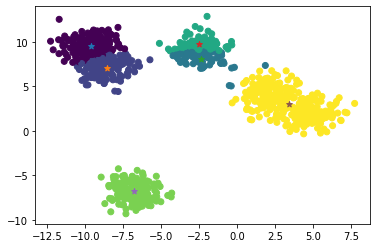

In [44]:
model1=CustomKNMeans(n_clusters=6,max_iters=10)
model1.fit(X)
model1.cluster_centers_

plt.scatter(X[:,0],X[:,1],c=model1.labels_)

for center in model1.cluster_centers_:
    plt.scatter(center[0],center[1],marker="*")

In [45]:
#again KNMeans , with n_init:
#taki vo pta laga le khud ki jab bhi sare distance lere hai , to jab total distance minimum hoga har iteration mai, uske hisab se hi cluster aur labels select hong
#isse phle tk hume khud chlana padra tha, minimum distance k liye ni aara tha
#ab yh khud min total dist lelega har bar jab kr re hai

In [1]:
class Cluster:
    def __init__(self,name,center):
        self.name=name #name of cluster
        self.center=center #its center
        self.points=[] #points in that cluster
        
    def dist(self,point):
        return np.sqrt(np.sum((self.center-point)**2)) #distance between a point between center and the particular point of a cluster
    
    def relocate(self):
        if len(self.points)>0:
            self.center=np.mean(self.points,axis=0) #updating cluster center, refer notebook notes for the algorithm.
        self.points=[] #as the center relocates, frse dekhenge dist between points and center, aur define krenge konsa point konse center ko belong krega
        
class CustomKNMeans2:
    
    def __init__(self,n_clusters=5,n_init=10,max_iters=300):
        self.n_clusters=n_clusters
        self.n_init=n_init
        self.max_iters=max_iters
        
    def fit(self,X): #it only takes as it is a unsupervised learning algorithm.
        clusters=[]  #we will start taking clusters
        timelineinfos=[]
        errors=[]
        for timeline in range(self.n_init):
        
            for i in range(self.n_clusters): #no of clusters you want to make.
                cluster=Cluster(i,random.choice(X))#seciond argument will be the cluster center, as written in the notes, 
                #the cluster centers should be taken randomly between the area where all the data is ,i.e X
                clusters.append(cluster) #now that the cluster has been created , start appending in it n_cluster times.

            for i in range(self.max_iters):
                labels=[] #noting the label of every point, that to which cluster it belongs.
                for point in X: #taking every point ,point by point in X(given data)
                    distances=[] #we will store distance of point in X and the cluster and store it in distances
                    for cluster in clusters:
                        distance=cluster.dist(point)
                        distances.append(distance)

                    selected=clusters[np.argmin(distances)]#jiska sabse chota distance hoga , us index k cluster ka hi part hoga vo point , har point ka cluster aise hi decide hoga
                    labels.append(selected.name)
                    selected.points.append(point)
                for cluster in clusters:
                    cluster.relocate()
            
            err=self.error(clusters,X,labels) 
            errors.append(err)
            timelineinfos.append([err,clusters,labels])
            
        #timeline to choose will be with minimum error
        err,cluster,labels=timelineinfos[np.argmin(errors)] #so all information jayegi jab minimum error h, uske basis p data store hoga   
        self.labels_=labels #taki sare labels isme aajaye ,labels_ isme,accesible
        self.cluster_centers_=np.array([cluster.center for cluster in clusters]) #list of centers
    
    def error(self,clusters,X,labels):
        err=0
        for point,label in zip(X,labels):
            cluster=clusters[label]
            distance=cluster.dist(point)
            err+=distance #total distance travelled
        return err

In [ ]:
model2=CustomKNMeans2(n_clusters=6,max_iters=10)
model2.fit(X)
model2.cluster_centers_

plt.scatter(X[:,0],X[:,1],c=model2.labels_)

for center in model2.cluster_centers_:
    plt.scatter(center[0],center[1],marker="*")